In [1]:
import tensorflow as tf
import string

In [2]:
### 学习26个字母的向量表示
X = Y = tf.constant(list(range(26)),dtype = tf.int32)

In [3]:
iterator = 10000
hidden_size = 10

In [7]:
X_in = tf.placeholder(tf.int32,shape = [1])
W1 = tf.Variable(tf.random_normal((26,hidden_size),stddev = 1))
W2 = tf.Variable(tf.random_normal((hidden_size,26),stddev = 1))

In [8]:
# X = tf.one_hot(X, 26, dtype = tf.int32)
Y = tf.one_hot(Y, 26, dtype = tf.int32)

In [9]:
lookup = tf.nn.embedding_lookup(W1,X_in)
y = tf.matmul(lookup,W2)
label = tf.one_hot(X_in, 26)
loss = tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = label)
op = tf.train.AdamOptimizer(0.001).minimize(loss)

In [10]:
loss_list = []
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(iterator):
        feed_x = i % 26
        _,r = sess.run([op,loss],feed_dict = {X_in : [feed_x]})
        loss_list.append(r)

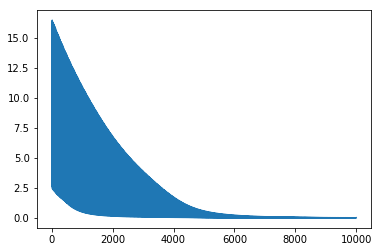

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(len(loss_list)),loss_list)

In [13]:
import numpy as np

In [14]:
### 使用CBOW, 用周围词预测当前词来学习词向量，使用该词左边的一个和右边的一个
X_in_c = tf.placeholder(tf.int32,shape = [1,2])
y_out_c = tf.placeholder(tf.int32,shape = [1])

In [15]:
W1_c = tf.Variable(tf.random_normal((26,hidden_size),stddev = 1))
W2_c = tf.Variable(tf.random_normal((hidden_size,26),stddev = 1))

In [16]:
lookup_c = tf.nn.embedding_lookup(W1_c,X_in_c)
lookup_c = tf.reduce_mean(lookup_c,1) # 在那个维度进行求平均处理
y = tf.matmul(lookup_c,W2_c)
label = tf.one_hot(y_out_c, 26)
loss = tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = label)
op = tf.train.AdamOptimizer(0.001).minimize(loss)

In [17]:
loss_list = []
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(iterator):
        feed_x = i % 26
        if feed_x == 0 or feed_x == 25:
            continue
        x_in_tmp = np.array([feed_x - 1,feed_x + 1]).reshape(1,2)
        _,r = sess.run([op,loss],feed_dict = {X_in_c :x_in_tmp ,y_out_c : [feed_x]})
        loss_list.append(r)
        

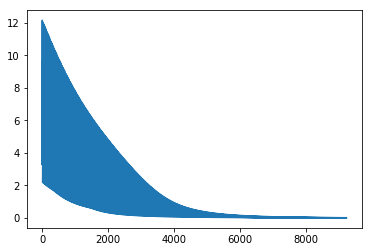

In [18]:
plt.plot(range(len(loss_list)),loss_list)

In [19]:
## 使用当前词来预测上下文的词 skip-gram
X_in_s = tf.placeholder(tf.int32,shape = [1])
y_out_s = tf.placeholder(tf.int32,shape = [1,2])

In [20]:
W1_s = tf.Variable(tf.random_normal((26,hidden_size),stddev = 1))
W2_s = tf.Variable(tf.random_normal((hidden_size,26),stddev = 1))

In [21]:
lookup_s = tf.nn.embedding_lookup(W1_s,X_in_s)
y = tf.matmul(lookup_s,W2_s)
label = tf.one_hot(y_out_s, 26)
loss = tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = label[:,0,:]) + tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = label[:,1,:])
op = tf.train.AdamOptimizer(0.001).minimize(loss)


In [22]:
loss_list = []
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(iterator):
        feed_x = i % 26
        if feed_x == 0 or feed_x == 25:
            continue
        x_in_tmp = np.array([feed_x - 1,feed_x + 1]).reshape(1,2)
        _, r = sess.run([op,loss],feed_dict = {X_in_s : [feed_x] , y_out_s :x_in_tmp})
        loss_list.append(r)

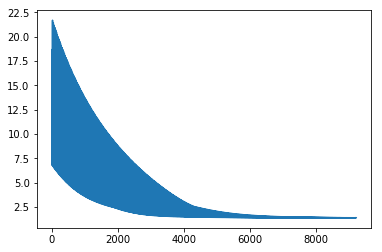

In [23]:
plt.plot(range(len(loss_list)),loss_list)